# IPL Winning Match Prediction

In [2]:
%pip install seaborn

In [3]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
match = pd.read_csv('matches.csv')

In [10]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
# Minimum starting id is 1 and Max is 11415 means some id records are missing in between because we have size of 756 only
match.shape

(756, 18)

In [14]:
# so as Match Id is just an denoting no as a reference so it don't have anything in deciding the winning team
match.drop(["id"], axis = 1,inplace = True)    # dropping id coloum
match.drop(["city"], axis = 1, inplace = True)       #dropping city coloumn becuase venue is already present
match.head()

,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
#Exploratory Data Analysis

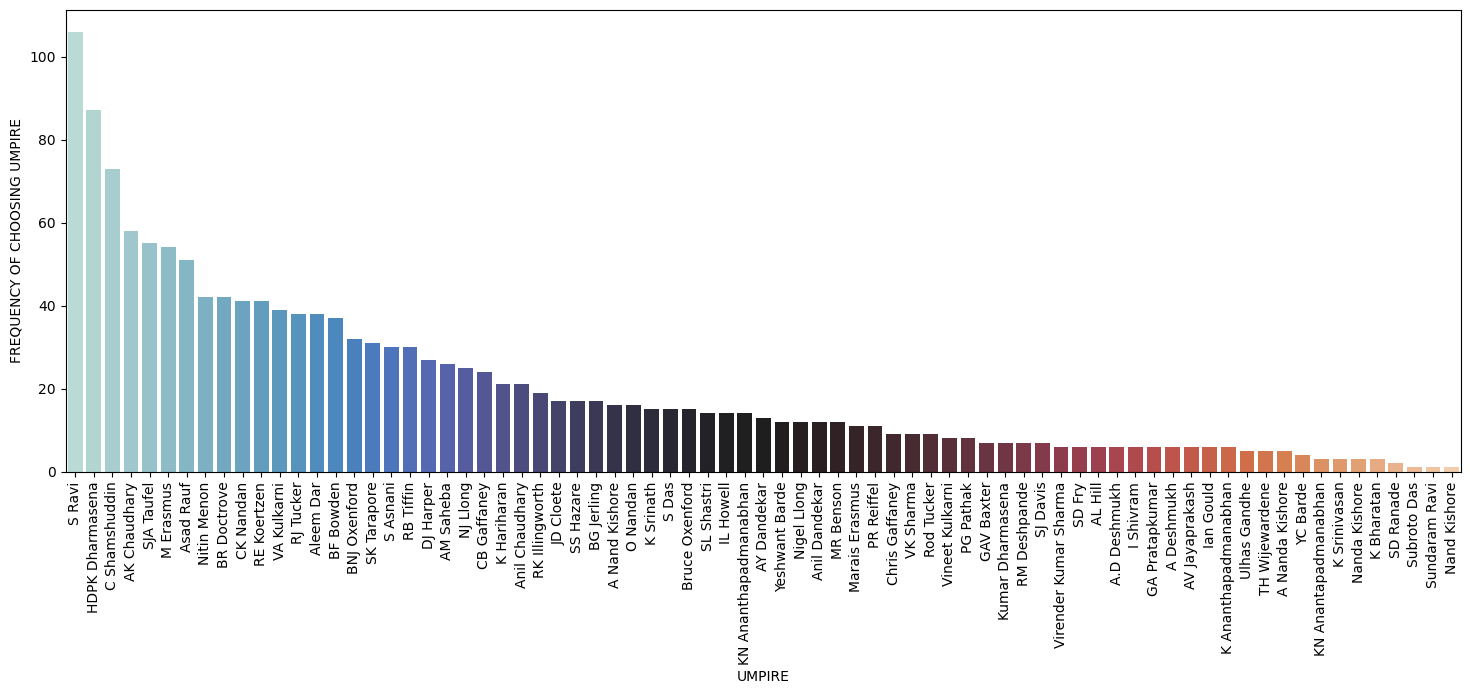

In [15]:
umpire = pd.melt(match, id_vars=['season'], value_vars=['umpire1', 'umpire2'])
umpire['value'].unique()

plt.figure(figsize=(18,6))
sns.countplot(x='value', data=umpire, palette="icefire", order = umpire['value'].value_counts().index)
plt.xlabel("UMPIRE")
plt.ylabel("FREQUENCY OF CHOOSING UMPIRE")
plt.xticks(rotation=90)
plt.show()

In [18]:
plt.savefig('Images_umpire.png')

<Figure size 640x480 with 0 Axes>

In [19]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   date             756 non-null    object
 2   team1            756 non-null    object
 3   team2            756 non-null    object
 4   toss_winner      756 non-null    object
 5   toss_decision    756 non-null    object
 6   result           756 non-null    object
 7   dl_applied       756 non-null    int64 
 8   winner           752 non-null    object
 9   win_by_runs      756 non-null    int64 
 10  win_by_wickets   756 non-null    int64 
 11  player_of_match  752 non-null    object
 12  venue            756 non-null    object
 13  umpire1          754 non-null    object
 14  umpire2          754 non-null    object
 15  umpire3          119 non-null    object
dtypes: int64(4), object(12)
memory usage: 59.1+ KB


In [20]:
match.isnull().sum()

season               0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

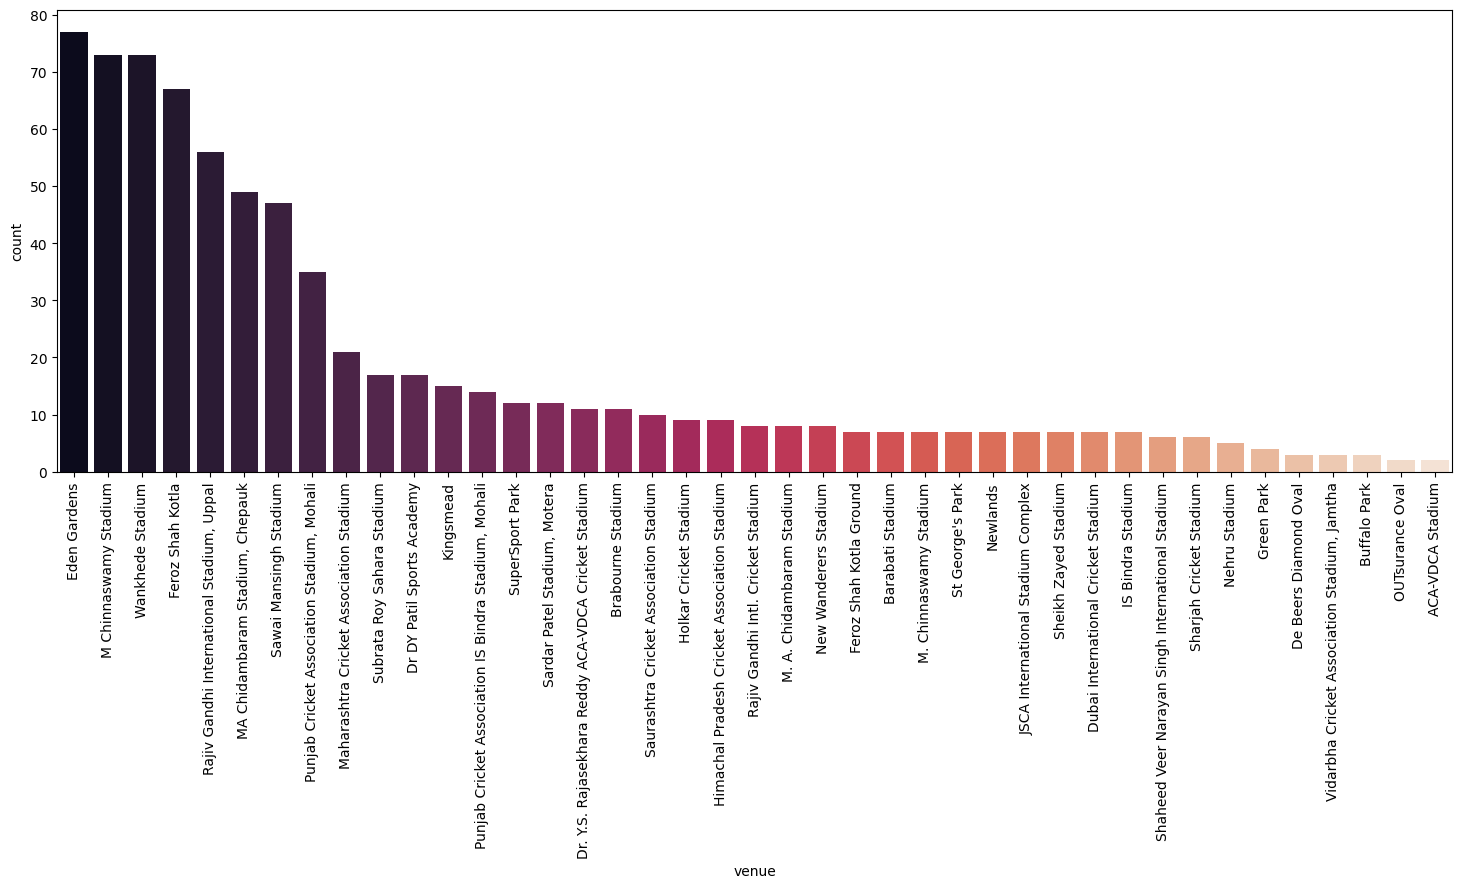

In [22]:
plt.figure(figsize = (18,6))
sns.countplot(x='venue', data=match,palette="rocket", order = match['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [30]:
match['player_of_match'].value_counts()[:30].index

Index(['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'MEK Hussey',
       'AM Rahane', 'V Kohli', 'V Sehwag', 'DR Smith', 'AD Russell',
       'A Mishra', 'JH Kallis', 'KA Pollard', 'SE Marsh', 'AT Rayudu',
       'SP Narine', 'Harbhajan Singh', 'SR Tendulkar', 'RA Jadeja', 'UT Yadav',
       'Rashid Khan', 'RV Uthappa', 'AC Gilchrist', 'M Vijay', 'RR Pant'],
      dtype='object')

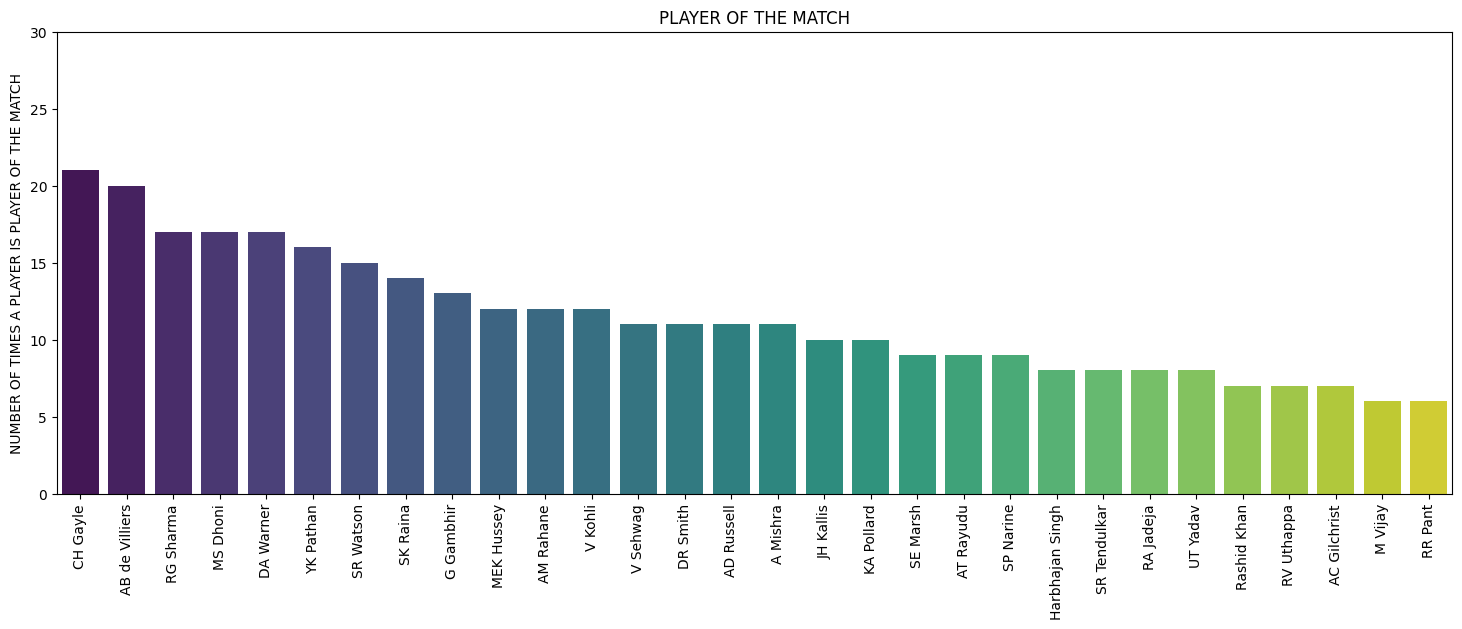

In [27]:
plt.figure(figsize = (18,6))
plt.ylim([0,30])
plt.title("PLAYER OF THE MATCH")
sns.barplot(x = match["player_of_match"].value_counts()[:30].index, y = match["player_of_match"].value_counts()[:30], palette="viridis")
plt.ylabel("NUMBER OF TIMES A PLAYER IS PLAYER OF THE MATCH")
plt.xticks(rotation=90)
plt.show()

In [31]:
match.dropna(axis = 0).shape

(118, 16)

In [32]:
#dropping the null values in row will be a loss of lots of data
# Hence we will choose to drop the umpire 3 column since lost of the missing values are in that column

In [35]:

match = match.drop(['umpire3'], axis = 1)

# considering game to be fair so, umpire1 and umpire2 will not affect the winner
match.drop(["umpire1"], axis = 1, inplace =True)
match.drop(["umpire2"], axis = 1, inplace = True)
match.shape

(756, 13)

In [36]:
match = match.dropna(axis = 0)

In [37]:
match.shape

(752, 13)

In [38]:
match.isnull().sum()

season             0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [39]:
match.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,752.00000,752.000000,752.000000,752.000000
mean,2013.43617,0.025266,13.353723,3.368351
std,3.36761,0.157036,23.513486,3.388114
min,2008.00000,0.000000,0.000000,0.000000
25%,2011.00000,0.000000,0.000000,0.000000
50%,2013.00000,0.000000,0.000000,4.000000
75%,2016.00000,0.000000,19.000000,6.000000
max,2019.00000,1.000000,146.000000,10.000000


In [40]:
match.nunique()

season              12
date               544
team1               15
team2               15
toss_winner         15
toss_decision        2
result               2
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
dtype: int64

In [41]:
match.result.unique()

array(['normal', 'tie'], dtype=object)

In [42]:
# results has 3 different values tie, no result and normal
#exclude tie and no results matches out of data
match = match[match.result == 'normal']

# Now as all results are normal so, we will remove the entire column
match = match.drop(["result"], axis = 1)

In [43]:
match.head()

,season,date,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [44]:
# Adding Results Column as 0 if team2 wins game 
match["result"] = 0    # add default as team2 wins then where team1 has win we will modify it later
match.head()

,season,date,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,result
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",0
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,0
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,0
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,0
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0


In [45]:
# to change prediction value to 1 if team1 wins and 0 if team 1 looses
# means 0 if team2 wins, This will help us to do prediction with accuracy

for ind in match.index:
    if(match['team1'][ind] == match['winner'][ind]):
        match["result"][ind] = 1

# Now as winner coloumn is not of any use so drop it
match = match.drop(['winner'], axis = 1)

<ipython-input-45-30f9a2bbe63c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match["result"][ind] = 1


In [46]:
match.head()

,season,date,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,result
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,0
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,0
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,0,6,GJ Maxwell,Holkar Cricket Stadium,0
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,15,0,KM Jadhav,M Chinnaswamy Stadium,1


In [47]:
# toss winner will not be decide team which will will match
# but the team which will be selecting field first will impatch the prediction 
# so, removing toss and if team1 is going to field then 1 else if bowl then 0
match["bat team"] = 0

for ind in match.index:
    if(match['team1'][ind] == match['toss_winner'][ind]):
        if(match['toss_decision'][ind] == 'bat'):
            match["bat team"][ind] = 1
        else:
            match["bat team"][ind] = 0
    else:
        if(match['toss_decision'][ind] == 'bat'):
            match["bat team"][ind] = 0
        else:
            match["bat team"][ind] = 1
            
match

<ipython-input-47-d1abe38de1b1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match["bat team"][ind] = 1
<ipython-input-47-d1abe38de1b1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match["bat team"][ind] = 1


,season,date,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,result,bat team
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,0,1
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,0,1
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,0,6,GJ Maxwell,Holkar Cricket Stadium,0,1
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,15,0,KM Jadhav,M Chinnaswamy Stadium,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,0,0,9,HH Pandya,Wankhede Stadium,0,1
752,2019,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,0,0,6,AS Yadav,M. A. Chidambaram Stadium,0,1
753,2019,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,0,0,2,RR Pant,ACA-VDCA Stadium,0,1
754,2019,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,0,0,6,F du Plessis,ACA-VDCA Stadium,0,1


In [48]:
# Verify some toss results manually, correct :)
# remove all colums related to toss

match = match.drop(['toss_decision'],axis= 1)
match = match.drop(['toss_winner'],axis= 1)

match.head()

,season,date,team1,team2,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,result,bat team
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,1
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,0,1
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,0,1
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,0,0,6,GJ Maxwell,Holkar Cricket Stadium,0,1
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,0,15,0,KM Jadhav,M Chinnaswamy Stadium,1,1


In [49]:
match = match.drop(['player_of_match'],axis = 1)

In [50]:
match.head()

,season,date,team1,team2,dl_applied,win_by_runs,win_by_wickets,venue,result,bat team
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,0,35,0,"Rajiv Gandhi International Stadium, Uppal",1,1
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,0,0,7,Maharashtra Cricket Association Stadium,0,1
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,0,0,10,Saurashtra Cricket Association Stadium,0,1
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,0,0,6,Holkar Cricket Stadium,0,1
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,0,15,0,M Chinnaswamy Stadium,1,1


In [51]:
match["bat team"]
match["bowl team"] = 0

for ind in match.index:
    if(match['bat team'][ind] == 1):
        match['bat team'][ind] = match['team1'][ind]
        match['bowl team'][ind] = match['team2'][ind]
    else:
        match['bat team'][ind] = match['team2'][ind]
        match['bowl team'][ind] = match['team1'][ind]
            
match.head()

<ipython-input-51-d988f9946f86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['bat team'][ind] = match['team1'][ind]
<ipython-input-51-d988f9946f86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['bowl team'][ind] = match['team2'][ind]


,season,date,team1,team2,dl_applied,win_by_runs,win_by_wickets,venue,result,bat team,bowl team
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,0,35,0,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,0,0,7,Maharashtra Cricket Association Stadium,0,Mumbai Indians,Rising Pune Supergiant
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,0,0,10,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kolkata Knight Riders
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,0,0,6,Holkar Cricket Stadium,0,Rising Pune Supergiant,Kings XI Punjab
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,0,15,0,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,Delhi Daredevils


## Feature engineering

In [52]:
match['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [53]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [54]:
match['count'] = 1
match.groupby(['venue']).count()['count']

venue
ACA-VDCA Stadium                                         2
Barabati Stadium                                         7
Brabourne Stadium                                       11
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Dubai International Cricket Stadium                      7
Eden Gardens                                            77
Feroz Shah Kotla                                        66
Feroz Shah Kotla Ground                                  6
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             9
Holkar Cricket Stadium                                   9
IS Bindra Stadium                                        7
JSCA International Stadium Complex                       7
Kingsmead                                         

In [55]:
match.head()

,season,date,team1,team2,dl_applied,win_by_runs,win_by_wickets,venue,result,bat team,bowl team,count
0,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,0,35,0,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1
1,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,0,0,7,Maharashtra Cricket Association Stadium,0,Mumbai Indians,Rising Pune Supergiant,1
2,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,0,0,10,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kolkata Knight Riders,1
3,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,0,0,6,Holkar Cricket Stadium,0,Rising Pune Supergiant,Kings XI Punjab,1
4,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,0,15,0,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,Delhi Daredevils,1


In [56]:
current_teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals']

current_venues = ['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'M. A. Chidambaram Stadium', 'Feroz Shah Kotla Ground',
       'M. Chinnaswamy Stadium', 'Rajiv Gandhi Intl. Cricket Stadium',
       'IS Bindra Stadium', 'ACA-VDCA Stadium']

match = match[(match['bat team'].isin(current_teams)) &(match['bowl team'].isin(current_teams))]
match = match[(match['venue'].isin(current_venues))]


In [57]:
match.head()
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          743 non-null    int64 
 1   date            743 non-null    object
 2   team1           743 non-null    object
 3   team2           743 non-null    object
 4   dl_applied      743 non-null    int64 
 5   win_by_runs     743 non-null    int64 
 6   win_by_wickets  743 non-null    int64 
 7   venue           743 non-null    object
 8   result          743 non-null    int64 
 9   bat team        743 non-null    object
 10  bowl team       743 non-null    object
 11  count           743 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 58.0+ KB


In [58]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
final_df = pd.get_dummies(data=match, columns=['bat team', 'bowl team', 'venue'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 80 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   season                                                      743 non-null    int64 
 1   date                                                        743 non-null    object
 2   team1                                                       743 non-null    object
 3   team2                                                       743 non-null    object
 4   dl_applied                                                  743 non-null    int64 
 5   win_by_runs                                                 743 non-null    int64 
 6   win_by_wickets                                              743 non-null    int64 
 7   result                                                      743 non-null    int64 
 8   count     

In [59]:
final_df = final_df.drop(["team1","team2","win_by_runs","win_by_wickets","count"], axis = 1)

In [60]:
final_df

,season,date,dl_applied,result,bat team_Chennai Super Kings,bat team_Deccan Chargers,bat team_Delhi Capitals,bat team_Delhi Daredevils,bat team_Gujarat Lions,bat team_Kings XI Punjab,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,2017,2017-04-05,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,2017-04-06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,2017-04-07,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,2017,2017-04-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,2017-04-08,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,05/05/19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
752,2019,07/05/19,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,2019,08/05/19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,2019,10/05/19,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 75 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   season                                                      743 non-null    int64 
 1   date                                                        743 non-null    object
 2   dl_applied                                                  743 non-null    int64 
 3   result                                                      743 non-null    int64 
 4   bat team_Chennai Super Kings                                743 non-null    uint8 
 5   bat team_Deccan Chargers                                    743 non-null    uint8 
 6   bat team_Delhi Capitals                                     743 non-null    uint8 
 7   bat team_Delhi Daredevils                                   743 non-null    uint8 
 8   bat team_G

## Data Preprocessing

In [62]:
from datetime import datetime
final_df["date"]= pd.to_datetime(final_df["date"])

final_df.drop(['date'], axis = 1)
#final_df['date'] = final_df['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

,season,dl_applied,result,bat team_Chennai Super Kings,bat team_Deccan Chargers,bat team_Delhi Capitals,bat team_Delhi Daredevils,bat team_Gujarat Lions,bat team_Kings XI Punjab,bat team_Kochi Tuskers Kerala,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,2017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
752,2019,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,2019,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Models

In [63]:
# to made the matrix
models = []
scores = []

In [64]:
# Splitting dataset into train and test
y = final_df["result"]
x = final_df.drop(['result','date'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


 **Logistic Regression**

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
model_score = accuracy_score(y_test, model_pred)

models.append('Logistic Regression')
scores.append(model_score)

model_score

0.5246636771300448

**Naive Bayes**

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)

In [46]:
nb_score

0.47085201793721976

In [67]:
models.append('Naive Bayes')
scores.append(nb_score)

 **Support Vector Classifier**


In [68]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)

In [69]:
svc_score

0.5336322869955157

In [70]:
models.append('Support Vector')
scores.append(svc_score)

**K Nearest Neighbours Classifier**

In [71]:
from sklearn.neighbors import KNeighborsClassifier

error_knn = []
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors = i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error_knn.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error')

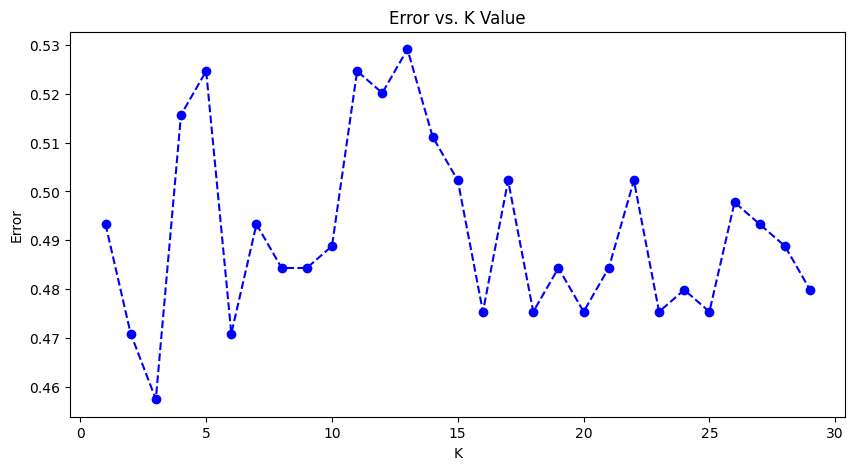

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), error_knn, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

In [73]:
k = error_knn.index(min(error_knn)) + 1
k

3

In [74]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
knn_score

0.5426008968609866

In [75]:
models.append('K Nearest Neighbours')
scores.append(knn_score)

**Decision Tree Classifier**

In [76]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    dtc = DecisionTreeClassifier(random_state=x)
    dtc.fit(X_train,y_train)
    dtc_pred = dtc.predict(X_test)
    current_accuracy = round(accuracy_score(dtc_pred,y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [77]:
dtc = DecisionTreeClassifier(random_state = best_x)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_pred)
dtc_score

0.547085201793722

In [78]:
models.append('Decision Tree')
scores.append(dtc_score)

**Random Forest Classifier**

In [79]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    rfc = RandomForestClassifier(random_state = x)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, rfc_pred)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        rfc_best_x = x
    

In [80]:
rfc = RandomForestClassifier(random_state = rfc_best_x)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_pred)
rfc_score

0.5515695067264574

In [81]:
models.append('Random Forest')
scores.append(rfc_score)

**XGBoost Classifier**

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)
xgb_score

0.49327354260089684

In [83]:
models.append('XGBoost')
scores.append(xgb_score)

 **Results**

In [84]:
percentage_scores = [score*100 for score in scores]

In [85]:
results = pd.DataFrame(list(zip(models, percentage_scores)), columns =['Models', 'Accuracy (%)'])
results

,Models,Accuracy (%)
0,Logistic Regression,52.466368
1,Naive Bayes,47.085202
2,Support Vector,53.363229
3,K Nearest Neighbours,54.260090
4,Decision Tree,54.708520
5,Random Forest,55.156951
6,XGBoost,49.327354


This has shows Highest accuracy

In [86]:
results['Accuracy (%)'].max()

55.15695067264574